Annie Zhou Homework 2

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import expit
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans 

In [189]:
df = pd.read_csv('notebook/possum.csv')

In [190]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [191]:
def linear_line(x, m, b):
    return m*x + b 

In [192]:
opt, cov = curve_fit(linear_line, df.hdlngth, df.totlngth)

print(opt)
print(cov)

[0.8336698  9.88823298]
[[ 7.45261273e-03 -6.90133423e-01]
 [-6.90133423e-01  6.40025906e+01]]


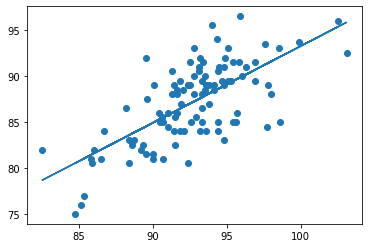

In [193]:
plt.scatter(df.hdlngth, df.totlngth)

plt.plot(df.hdlngth, linear_line(df.hdlngth, opt[0], opt[1]))

QUESTION 1: How well does the method describe the data?

ANSWER 1: The method does not really describe the data well. We can see that the the data is scattered all over the graph

In [194]:
femaledata = df.loc[df['sex'] == 'f']

In [195]:
femaledata.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0


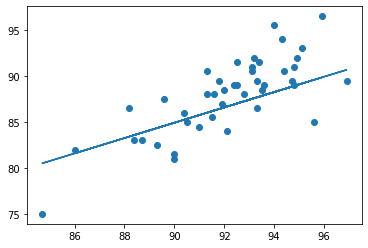

In [196]:
plt.scatter(femaledata.hdlngth, femaledata.totlngth)

plt.plot(femaledata.hdlngth, linear_line(femaledata.hdlngth, opt[0], opt[1]))

In [197]:
femaledata.totlngth_pred = linear_line(femaledata.hdlngth, *opt)

/var/folders/12/4pcpnxp94hbggfkh91hkpkl00000gn/T/ipykernel_13822/1437648744.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  femaledata.totlngth_pred = linear_line(femaledata.hdlngth, *opt)


In [198]:
print(r2_score(femaledata.totlngth, femaledata.totlngth_pred))
print(mean_squared_error(femaledata.totlngth, femaledata.totlngth_pred))

0.4526029275679738
9.351934083858993


In [199]:
maledata = df.loc[df['sex'] == 'm']

In [200]:
maledata.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
12,13,1,Vic,m,5.0,95.1,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0
13,14,1,Vic,m,3.0,95.4,57.6,91.5,36.0,74.3,53.7,15.1,28.0,31.5
14,15,1,Vic,m,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0


In [201]:
opt, cov = curve_fit(linear_line,  maledata.hdlngth, maledata.totlngth)

print(opt)
print(cov)

[ 0.75492169 16.36192412]
[[ 9.08937276e-03 -8.44611332e-01]
 [-8.44611332e-01  7.86360025e+01]]


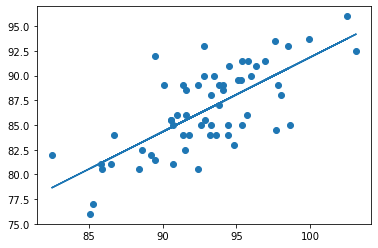

In [202]:
plt.scatter(maledata.hdlngth, maledata.totlngth)

plt.plot(maledata.hdlngth, linear_line(maledata.hdlngth, opt[0], opt[1]))

In [203]:
maledata.totlngth_pred = linear_line(maledata.hdlngth, *opt)

/var/folders/12/4pcpnxp94hbggfkh91hkpkl00000gn/T/ipykernel_13822/2062638031.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  maledata.totlngth_pred = linear_line(maledata.hdlngth, *opt)


In [204]:
print(r2_score(maledata.totlngth, maledata.totlngth_pred))
print(mean_squared_error(maledata.totlngth, maledata.totlngth_pred))

0.5152026478596556
8.981323695188028


QUESTION 2: If you perform regression for male and female possums separately, does this increase our accuracy?

ANSWER 2: The accuracy is a little better than what it was before we split the data by gender. This method is still not that good as the data is still scattered around in wide range on the graph

In [205]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [206]:
df = df.dropna()

In [207]:
lasso_hdlngth = np.array(df.hdlngth).reshape(-1,1)

In [208]:
df['sex_num'] = df['sex'].replace(['f','m'],
                        [0, 1], inplace=False)

In [209]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['skullw', 'footlgth', 'taill', 'earconch', 'eye', 'chest', 'belly', 'age']].values
y = train['sex'].values
y_num = train['sex_num'].values

test_x = test[['skullw', 'footlgth', 'taill', 'earconch', 'eye', 'chest', 'belly', 'age']].values
test_y = test['sex'].values
test_y_num = test['sex_num'].values

print(test_y_num)

[0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0]


In [210]:
#df = df.replace(-np.inf, np.nan)

In [211]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_num
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0


In [212]:
lasso = Lasso(alpha=0.11)
lasso.fit(x, y_num)

Lasso(alpha=0.11)

In [213]:
lasso_train= lasso.predict(x)
lasso_test= lasso.predict(test_x)

In [214]:
print(lasso.coef_)

[ 0.         -0.00870924 -0.         -0.00084546  0.00045762 -0.
 -0.         -0.        ]


QUESTION 3: What are the three best classifiers?

ANSWER 3: The three beat classifiers is the foot length, earconch and eye!

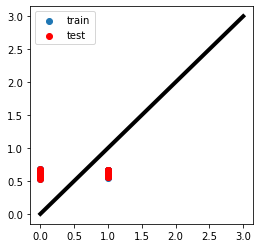

In [215]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,lasso_train, label='train')
plt.scatter(test_y_num,lasso_test,color='r', label='test')
plt.plot([0,3],[0,3],lw=4,color='black')
plt.legend()

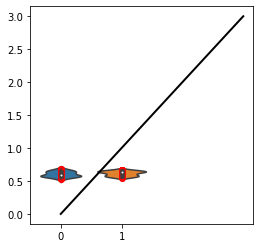

In [216]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=lasso_train,data=df, xlim=[0,3])
plt.scatter(y_num,lasso_train,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

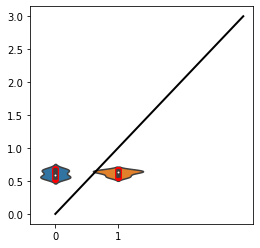

In [217]:
plt.figure(figsize=(4,4))
sns.violinplot(x=test_y_num,y=lasso_test,data=df, xlim=[0,3])
plt.scatter(test_y_num,lasso_test,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

In [218]:
print("Train error",mean_squared_error(y_num,lasso_train))
print("Train R-sq",r2_score(y_num,lasso_train))

print("\nTest error",mean_squared_error(test_y_num,lasso_test))
print("Test R-sq",r2_score(test_y_num,lasso_test))

Train error 0.23364572681037848
Train R-sq 0.015580874531651023

Test error 0.26279954887651874
Test R-sq -0.05358728231404353


Use logistic regression to determine whether a possum is male or female, then use a different classification method. Make sure to visualize the data.

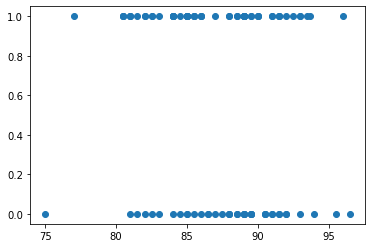

In [219]:
plt.scatter(df["totlngth"], df["sex_num"])

Pick 2 classification methods discussed in class and use them to classify possums by either collection site # or population. Make sure to visualize each of your classification attempts.

In [220]:
x_train,x_test,y_train,y_test=train_test_split(df["totlngth"],df["sex_num"],test_size=0.2,random_state=0)

In [221]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [222]:
logreg = LogisticRegression()

In [223]:
print(x_train)
print(np.array(y_train))

[[86. ]
 [92. ]
 [89. ]
 [85. ]
 [93.5]
 [89.5]
 [89. ]
 [86.5]
 [84. ]
 [89.5]
 [80.5]
 [88.5]
 [80.5]
 [92.5]
 [87. ]
 [90.5]
 [88. ]
 [85. ]
 [81. ]
 [91.5]
 [88.5]
 [81. ]
 [81. ]
 [85.5]
 [86. ]
 [90. ]
 [77. ]
 [75. ]
 [90.5]
 [83. ]
 [88.5]
 [89. ]
 [85. ]
 [88. ]
 [91.5]
 [92. ]
 [88. ]
 [84. ]
 [93.7]
 [89.5]
 [94. ]
 [87. ]
 [86. ]
 [81.5]
 [84.5]
 [89. ]
 [87.5]
 [85.5]
 [84. ]
 [89. ]
 [84. ]
 [91. ]
 [89. ]
 [82.5]
 [82. ]
 [96.5]
 [86.5]
 [89. ]
 [85.5]
 [90. ]
 [80.5]
 [92. ]
 [88. ]
 [84.5]
 [88. ]
 [90.5]
 [89.5]
 [82. ]
 [85. ]
 [83. ]
 [89. ]
 [82.5]
 [91. ]
 [93. ]
 [89.5]
 [82.5]
 [90. ]
 [88.5]
 [85. ]
 [85. ]]
[0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1
 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1
 0 1 1 1 0 1]


In [224]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [225]:
x_line = np.linspace(30,110,1000)
y_line = x_line * logreg.coef_ + logreg.intercept_

In [226]:
sigmoid = expit(y_line)

Text(0, 0.5, 'sex_num')

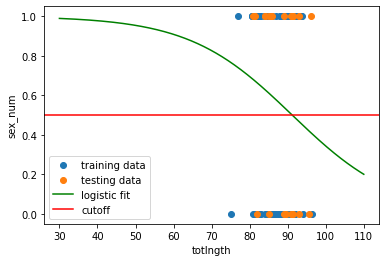

In [227]:
plt.scatter(x_train, y_train, label="training data")
plt.scatter(x_test, y_test, label="testing data")
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend()
plt.xlabel("totlngth")
plt.ylabel("sex_num")

In [228]:
y_pred = logreg.predict(x_test)

In [229]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.8173076923076925
0.42857142857142855


In [230]:
dt = tree.DecisionTreeRegressor(max_depth=4)
dt.fit(x,y_num)

DecisionTreeRegressor(max_depth=4)

In [231]:
dt_train=dt.predict(x)
dt_test=dt.predict(test_x)

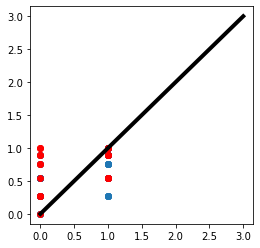

In [232]:
plt.figure(figsize=(4,4))

plt.scatter(y_num, dt_train)
plt.scatter(test_y_num, dt_test,color='r')
plt.plot([0,3],[0,3],lw=4,color='black')

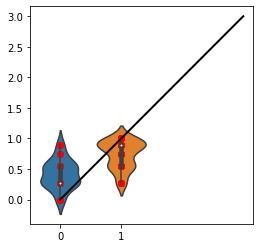

In [233]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=dt_train,data=df, xlim=[0,3])
plt.scatter(y_num,dt_train,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

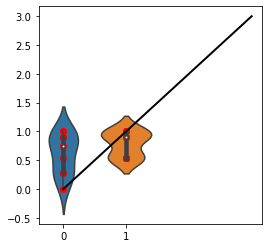

In [234]:
plt.figure(figsize=(4,4))
sns.violinplot(x=test_y_num,y=dt_test,data=df, xlim=[0,3])
plt.scatter(test_y_num,dt_test,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

In [235]:
print("Train error",mean_squared_error(y_num,dt_train))
print("Train R-sq",r2_score(y_num,dt_train))

print("\nTest error",mean_squared_error(y_test, y_pred))
print("Test R-sq",r2_score(y_test, y_pred))

Train error 0.16086805555555556
Train R-sq 0.3222149074683637

Test error 0.42857142857142855
Test R-sq -0.8173076923076925


QUESTION 4: Which appears to be more accurate?

ANSWER 4: The error on the lasso is higher than the error on the decision tree. The decision tree is more accurate.

Pick 2 classification methods discussed in class and use them to classify possums by either collection site # or population. Make sure to visualize each of your classification attempts.

In [236]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[3 5]
 [4 9]]


In [237]:
print(y_test)
print(y_pred)

26    0
89    1
2     0
58    1
78    1
97    1
16    0
76    1
57    1
99    1
56    0
96    1
81    0
13    1
7     0
30    1
22    0
24    1
33    1
8     0
46    1
Name: sex_num, dtype: int64
[1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1]


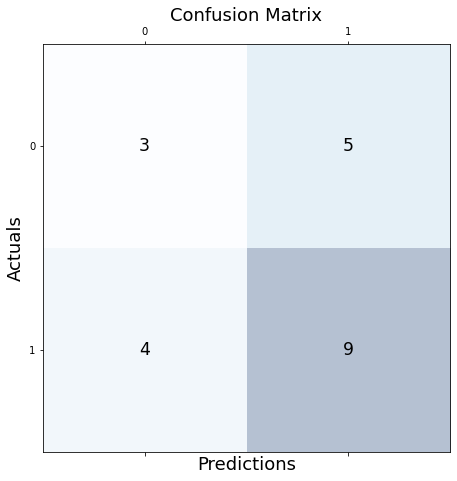

In [238]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [239]:
print(y_num)
print(dt_train)

[1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 1 0 0 1 1 0]
[0.9        0.27777778 0.9        0.54166667 0.54166667 0.54166667
 0.9        0.75       0.54166667 0.54166667 0.9        0.9
 0.         0.54166667 0.9        0.9        0.54166667 0.27777778
 0.54166667 0.27777778 0.27777778 0.75       0.75       0.27777778
 0.9        0.27777778 1.         0.         0.54166667 0.27777778
 0.75       1.         0.9        0.27777778 0.9        0.54166667
 1.         0.54166667 0.27777778 0.9        0.54166667 0.27777778
 0.75       0.54166667 0.27777778 0.27777778 0.27777778 0.27777778
 1.         0.9        1.         0.54166667 0.9        0.9
 0.9        0.54166667 0.75       1.         0.9        1.
 0.54166667 0.54166667 0.54166667 0.54166667 0.9        0.27777778
 0.75       0.9        0.54166667 0.         0.54166667 0.54166667
 0.75       0.27777778 0.54166667 0.9        0.2777777

In [241]:
#conf_matrix = metrics.confusion_matrix(y_num,dt_train)
#print(conf_matrix)

QUESTION 5: How do the confusion matrices compare?

ANSWER 5:The decision tree is more accurate in comparison to the logistic regression

Pick 2 classification methods discussed in class and use them to classify possums by either collection site # or population. Make sure to visualize each of your classification attempts.

In [247]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_num,Pop_num
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0


In [310]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['site']].values
y = train['site'].values
y_num = train['site'].values

test_x = test[['site']].values
test_y = test['site'].values
test_y_num = test['site'].values

print(test_y_num)

[3 6 5 7 1 1 1 5 1 3 6 3 7 1 6 2 5 1 4 6 1]


In [311]:
kmeans_train = kmeans.fit_predict(x)
kmeans_test = kmeans.fit_predict(test_x)

In [312]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)

In [313]:
kmeans_train = kmeans.fit_predict(x)
kmeans_test = kmeans.fit_predict(test_x)

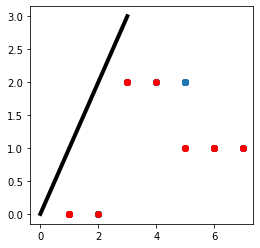

In [314]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,kmeans_train)
plt.scatter(test_y_num,kmeans_test,color='r')
plt.plot([0,3],[0,3],lw=4,color='black')

In [316]:
print("Train error",mean_squared_error(y_num,kmeans_train))
print("Train R-sq",r2_score(y_num,kmeans_train))

print("\nTest error",mean_squared_error(test_y_num,kmeans_test))
print("Test R-sq",r2_score(test_y_num,kmeans_test))

Train error 12.2625
Train R-sq -1.1475481611208402

Test error 11.333333333333334
Test R-sq -1.3074792243767313


In [317]:
dt = tree.DecisionTreeRegressor(max_depth=4)
dt.fit(x,y_num)

DecisionTreeRegressor(max_depth=4)

In [318]:
dt_train=dt.predict(x)
dt_test=dt.predict(test_x)

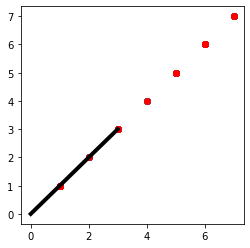

In [319]:
plt.figure(figsize=(4,4))

plt.scatter(y_num, dt_train)
plt.scatter(test_y_num, dt_test,color='r')
plt.plot([0,3],[0,3],lw=4,color='black')

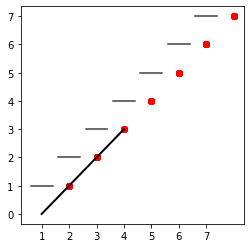

In [320]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=dt_train,data=df, xlim=[0,3])
plt.scatter(y_num,dt_train,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

In [324]:
print("Train error",mean_squared_error(y_num,dt_train))
print("Train R-sq",r2_score(y_num,dt_train))



print("\nTest error",mean_squared_error(test_y_num,kmeans_test))
print("Test R-sq",r2_score(test_y_num,kmeans_test))

Train error 0.0
Train R-sq 1.0

Test error 11.333333333333334
Test R-sq -1.3074792243767313


QUESTION 6:Which classification method is more accurate?

ANSWER 6: I think the method that is more accurate is the decision tree method

QUESTION 7: What properties are most important for an accurate prediction?

ANSWER 7: I think the most important property for an accurate prediction is evaluating the test and train error. This helps us understand exactly how accurate is our predictions and models. We can base the accuracy off of this

QUESTION 8: Can this data be classified into these categories well?

I think that it is classified into the decison tree well, but I am unsure about the kmeans method.